**import all library**

In [1]:
# import all require libary
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import glob
import nibabel as nib
import cv2
import imageio
from tqdm.notebook import tqdm
from ipywidgets import *
from PIL import Image
from fastai.basics import *
from fastai.vision.all import *
from fastai.data.transforms import *
import random
from matplotlib.pyplot import figure
import nibabel as nib
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

2024-02-19 11:17:26.996291: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-19 11:17:26.996719: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-19 11:17:27.172018: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**Load Data**

In [2]:
files=[]
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
      files.append((dirname, filename))

# **Preprocessing**

In [3]:
# Create a DataFrame from the file list
df_files = pd.DataFrame(files, columns=['dirname', 'filename'])

# Sort the DataFrame by filename in ascending order
df_files = df_files.sort_values(by='filename')

# Display the DataFrame
print(df_files.head())

                                                  dirname  \
182                                /kaggle/input/resnet50   
89   /kaggle/input/liver-tumor-segmentation/segmentations   
81   /kaggle/input/liver-tumor-segmentation/segmentations   
142  /kaggle/input/liver-tumor-segmentation/segmentations   
31   /kaggle/input/liver-tumor-segmentation/segmentations   

                 filename  
182   resnet50_weights.h5  
89     segmentation-0.nii  
81     segmentation-1.nii  
142   segmentation-10.nii  
31   segmentation-100.nii  


In [4]:
# Map CT scan and label

df_files["mask_dirname"]  = ""
df_files["mask_filename"] = ""

for i in range(131):
    ct = f"volume-{i}.nii"
    mask = f"segmentation-{i}.nii"

    df_files.loc[df_files['filename'] == ct, 'mask_filename'] = mask
    df_files.loc[df_files['filename'] == ct, 'mask_dirname'] = "/kaggle/input/liver-tumor-segmentation/segmentations"

# drop segment rows
df_files = df_files[df_files.mask_filename != ''].sort_values(by=['filename']).reset_index(drop=True)

df_files

,dirname,filename,mask_dirname,mask_filename
0,/kaggle/input/liver-tumor-segmentation/volume_pt1,volume-0.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-0.nii
1,/kaggle/input/liver-tumor-segmentation/volume_pt1,volume-1.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-1.nii
2,/kaggle/input/liver-tumor-segmentation/volume_pt1,volume-10.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-10.nii
3,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-11.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-11.nii
4,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-12.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-12.nii
5,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-13.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-13.nii
6,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-14.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-14.nii
7,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-15.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-15.nii
8,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-16.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-16.nii
9,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-17.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-17.nii


In [5]:
# read nii file 
def read_nii(filepath):
    ct_scan = nib.load(filepath)
    array   = ct_scan.get_fdata()
    array   = np.rot90(np.array(array))
    return(array)

In [6]:
#here set variable sample
sample = 40
#This line reads a CT scan file using the read_nill function
sample_ct = read_nii(df_files.loc[sample,'dirname']+"/"+df_files.loc[sample,'filename'])
#This line reads a Mask scan file using the read_nill function
sample_mask = read_nii(df_files.loc[sample,'mask_dirname']+"/"+df_files.loc[sample,'mask_filename'])
#here show CT shape and Mask Shape
print(f'CT Shape:   {sample_ct.shape}\nMask Shape: {sample_mask.shape}')

CT Shape:   (512, 512, 74)
Mask Shape: (512, 512, 74)


In [7]:
# here find ct array min and max value
print(np.amin(sample_ct), np.amax(sample_ct))
# here find mask array min and max value
print(np.amin(sample_mask), np.amax(sample_mask))

-1024.0 1023.0
0.0 2.0


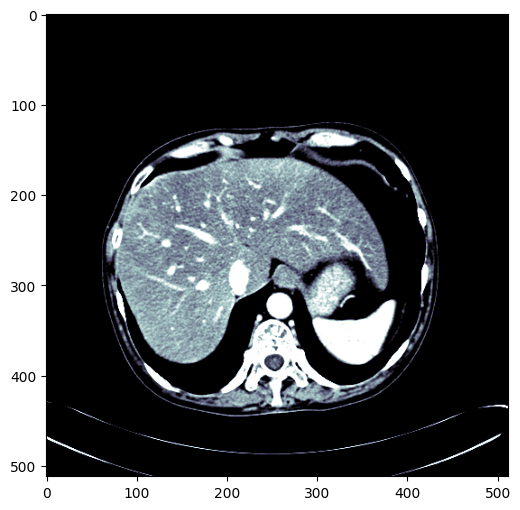

In [8]:
# Preprocess the nii file
#it extends the functionality of PyTorch's
dicom_windows = types.SimpleNamespace(
    brain=(80,40),
    subdural=(254,100),
    stroke=(8,32),
    brain_bone=(2800,600),
    brain_soft=(375,40),
    lungs=(1500,-600),
    mediastinum=(350,50),
    abdomen_soft=(400,50),
    liver=(150,30),
    spine_soft=(250,50),
    spine_bone=(1800,400),
    custom = (200,60)
)
#This decorator is used to add a new method windowed to the Tensor class.
@patch
#The result is a tensor with pixel values scaled between 0 and 1, representing the windowed image.
def windowed(self:Tensor, w, l):
    px = self.clone()
    px_min = l - w//2
    px_max = l + w//2
    px[px<px_min] = px_min
    px[px>px_max] = px_max
    return (px-px_min) / (px_max-px_min)

figure(figsize=(8, 6), dpi=100)
#It appears you're applying the liver window settings (dicom_windows.liver) to the slice to visualize the liver tissue in the CT scan
plt.imshow(tensor(sample_ct[..., 55].astype(np.float32)).windowed(*dicom_windows.liver), cmap=plt.cm.bone);

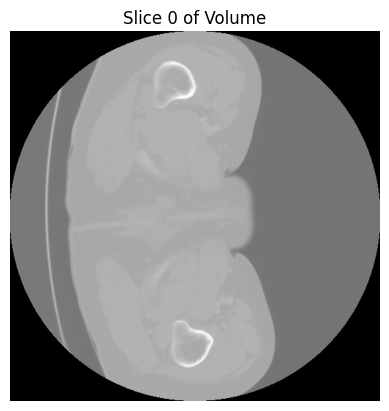

In [9]:
# this code read nii file and show original data

# Load the NIfTI file
volume_nifti = nib.load('/kaggle/input/liver-tumor-segmentation/volume_pt1/volume-0.nii')

# Extract the data array from the NIfTI file
volume_data = volume_nifti.get_fdata()

# Choose a slice to display (e.g., slice 0 along the first axis)
slice_index = 0

# Plot the chosen slice
plt.imshow(volume_data[..., slice_index], cmap='gray')
plt.title('Slice {} of Volume'.format(slice_index))
plt.axis('off')
plt.show()

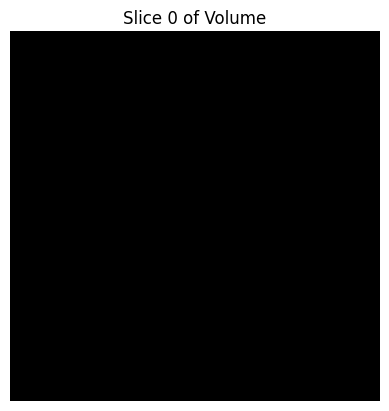

In [10]:
# this code read nii file and show original data

# Load the NIfTI file
volume_nifti = nib.load('/kaggle/input/liver-tumor-segmentation/segmentations/segmentation-10.nii')

# Extract the data array from the NIfTI file
volume_data = volume_nifti.get_fdata()

# Choose a slice to display (e.g., slice 0 along the first axis)
slice_index = 0

# Plot the chosen slice
plt.imshow(volume_data[..., slice_index], cmap='gray')
plt.title('Slice {} of Volume'.format(slice_index))
plt.axis('off')
plt.show()

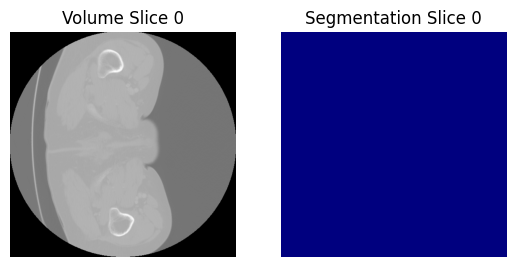

In [11]:
# this code read nii file and show original data

# Load the NIfTI file containing the volume
volume_nifti = nib.load('/kaggle/input/liver-tumor-segmentation/volume_pt1/volume-0.nii')

# Load the NIfTI file containing the segmentation image
segmentation_nifti = nib.load('/kaggle/input/liver-tumor-segmentation/segmentations/segmentation-0.nii')

# Extract the data arrays from the NIfTI files
volume_data = volume_nifti.get_fdata()
segmentation_data = segmentation_nifti.get_fdata()

# Choose a slice to display (e.g., slice 0 along the first axis)
slice_index = 0

# Plot the volume slice
plt.subplot(1, 2, 1)
plt.imshow(volume_data[..., slice_index], cmap='gray')
plt.title('Volume Slice {}'.format(slice_index))
plt.axis('off')

# Plot the segmentation slice
plt.subplot(1, 2, 2)
plt.imshow(segmentation_data[..., slice_index], cmap='jet')  # Adjust the colormap as needed
plt.title('Segmentation Slice {}'.format(slice_index))
plt.axis('off')

plt.show()

In [12]:
def plot_sample(array_list, color_map = 'nipy_spectral'):
    '''
    Plots and a slice with all available annotations
    '''
    fig = plt.figure(figsize=(20,16), dpi=100)

    plt.subplot(1,4,1)
    plt.imshow(array_list[0], cmap='bone')
    plt.title('Original Image')
    plt.axis('off')
    #presumably a medical image, converts it to a PyTorch tensor, and applies windowing using the parameters from dicom_windows.liver. It uses the 'bone' color map for visualization, adds a title "Windowed Image", and turns off the axis.
    plt.subplot(1,4,2)
    plt.imshow(tensor(array_list[0].astype(np.float32)).windowed(*dicom_windows.liver), cmap='bone');
    plt.title('Windowed Image')
    plt.axis('off')

    plt.subplot(1,4,3)
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Mask')
    plt.axis('off')

    plt.subplot(1,4,4)
    plt.imshow(array_list[0], cmap='bone')
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Liver & Mask')
    plt.axis('off')

    plt.show()

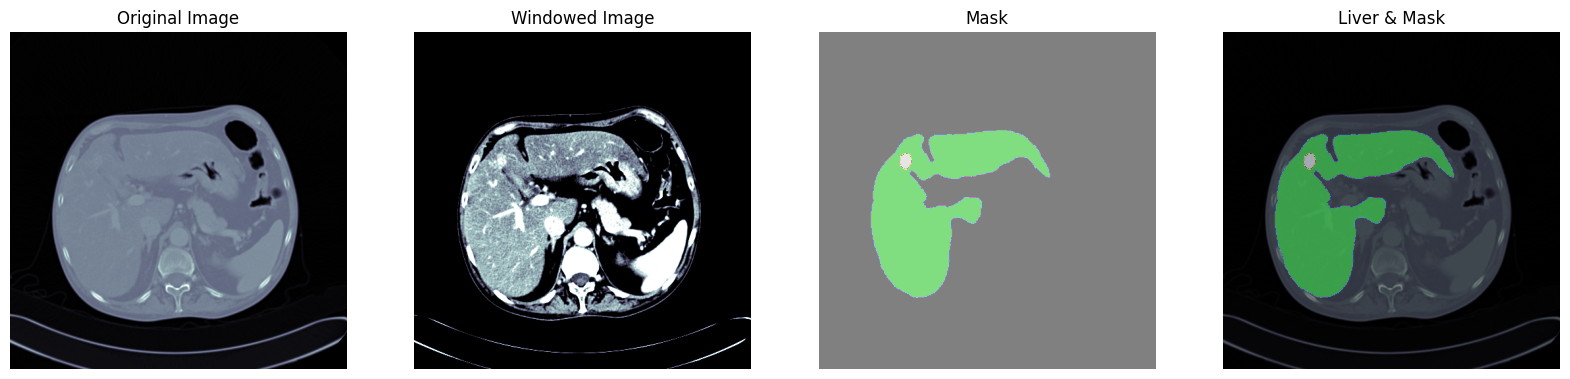

In [13]:
sample = 40

sample_slice = tensor(sample_ct[...,sample].astype(np.float32))

plot_sample([sample_ct[..., sample],
             sample_mask[..., sample]])

In [14]:
# Check the mask values
mask = Image.fromarray(sample_mask[...,sample].astype('uint8'), mode="L")
unique, counts = np.unique(mask, return_counts=True)
print(np.array((unique, counts)).T)

[[     0 230719]
 [     1  31079]
 [     2    346]]


<Axes: >

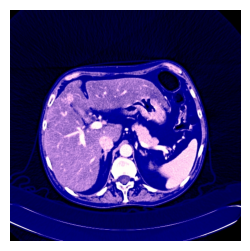

In [15]:
# Preprocessing functions
class TensorCTScan(TensorImageBW): _show_args = {'cmap':'bone'}

@patch
def freqhist_bins(self:Tensor, n_bins=100):
    "A function to split the range of pixel values into groups, such that each group has around the same number of pixels"
    imsd = self.view(-1).sort()[0]
    t = torch.cat([tensor([0.001]),
                   torch.arange(n_bins).float()/n_bins+(1/2/n_bins),
                   tensor([0.999])])
    t = (len(imsd)*t).long()
    return imsd[t].unique()

@patch
def hist_scaled(self:Tensor, brks=None):
    "Scales a tensor using `freqhist_bins` to values between 0 and 1"
    if self.device.type=='cuda': return self.hist_scaled_pt(brks)
    if brks is None: brks = self.freqhist_bins()
    ys = np.linspace(0., 1., len(brks))
    x = self.numpy().flatten()
    x = np.interp(x, brks.numpy(), ys)
    return tensor(x).reshape(self.shape).clamp(0.,1.)


@patch
def to_nchan(x:Tensor, wins, bins=None):
    res = [x.windowed(*win) for win in wins]
    if not isinstance(bins,int) or bins!=0: res.append(x.hist_scaled(bins).clamp(0,1))
    dim = [0,1][x.dim()==3]
    return TensorCTScan(torch.stack(res, dim=dim))

@patch
def save_jpg(x:(Tensor), path, wins, bins=None, quality=120):
    fn = Path(path).with_suffix('.jpg')
    x = (x.to_nchan(wins, bins)*255).byte()
    im = Image.fromarray(x.permute(1,2,0).numpy(), mode=['RGB','CMYK'][x.shape[0]==4])
    im.save(fn, quality=quality)

_,axs = subplots(1,1)

sample_slice.save_jpg('test.jpg', [dicom_windows.liver, dicom_windows.custom])
show_image(Image.open('test.jpg'), ax=axs[0], figsize=(8, 6))

In [16]:
# generate image from nii file
# Make custom JPG files for Unet training

GENERATE_JPG_FILES = True

if GENERATE_JPG_FILES:

    path = Path(".")

    os.makedirs('train_images', exist_ok=True)
    os.makedirs('train_masks', exist_ok=True)

    ## test folder
    os.makedirs('test_images', exist_ok=True)
    os.makedirs('test_masks', exist_ok=True)

    # Split the data into train and test sets
    train_df, test_df = train_test_split(df_files, test_size=0.1, random_state=42)

    # Check if train_df is empty
    print("Length of train_df:", len(train_df))

    # Reset index for contiguous indices
    train_df = train_df.reset_index(drop=True)
    # Check if test_df is empty
    print("Length of test_df:", len(test_df))
    test_df = test_df.reset_index(drop=True)

    # Loop for training set
    for ii in tqdm(range(len(train_df))):
        curr_ct = read_nii(train_df.loc[ii, 'dirname'] + "/" + train_df.loc[ii, 'filename'])
        curr_mask = read_nii(train_df.loc[ii, 'mask_dirname'] + "/" + train_df.loc[ii, 'mask_filename'])
        curr_file_name = str(train_df.loc[ii, 'filename']).split('.')[0]
        curr_dim = curr_ct.shape[2]

        for curr_slice in range(0, curr_dim, 2):
            data = tensor(curr_ct[..., curr_slice].astype(np.float32))
            mask = Image.fromarray(curr_mask[..., curr_slice].astype('uint8'), mode="L")
            data.save_jpg(f"train_images/{curr_file_name}_slice_{curr_slice}.jpg", [dicom_windows.liver, dicom_windows.custom])
            mask.save(f"train_masks/{curr_file_name}_slice_{curr_slice}_mask.png")

    ### test image save
    for ii in tqdm(range(len(test_df))):
        curr_ct = read_nii(test_df.loc[ii, 'dirname'] + "/" + test_df.loc[ii, 'filename'])
        curr_mask = read_nii(test_df.loc[ii, 'mask_dirname'] + "/" + test_df.loc[ii, 'mask_filename'])
        curr_file_name = str(test_df.loc[ii, 'filename']).split('.')[0]
        curr_dim = curr_ct.shape[2]

        for curr_slice in range(0, curr_dim, 2):
            data = tensor(curr_ct[..., curr_slice].astype(np.float32))
            mask = Image.fromarray(curr_mask[..., curr_slice].astype('uint8'), mode="L")
            data.save_jpg(f"test_images/{curr_file_name}_slice_{curr_slice}.jpg", [dicom_windows.liver, dicom_windows.custom])
            mask.save(f"test_masks/{curr_file_name}_slice_{curr_slice}_mask.png")

else:
    path = Path("../input/liver-segmentation-with-fastai-v2")  # read jpg from saved kernel output

Length of train_df: 45
Length of test_df: 6


  0%|          | 0/45 [00:00<?, ?it/s]

pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


  0%|          | 0/6 [00:00<?, ?it/s]

pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


In [17]:
#show data
print("\nFirst few rows of Training Set:")
print(train_df.head())

print("\nFirst few rows of Testing Set:")
print(test_df.head())


First few rows of Training Set:
                                             dirname       filename  \
0  /kaggle/input/liver-tumor-segmentation/volume_pt3  volume-24.nii   
1  /kaggle/input/liver-tumor-segmentation/volume_pt4  volume-38.nii   
2  /kaggle/input/liver-tumor-segmentation/volume_pt2  volume-11.nii   
3  /kaggle/input/liver-tumor-segmentation/volume_pt4  volume-36.nii   
4  /kaggle/input/liver-tumor-segmentation/volume_pt2  volume-20.nii   

                                           mask_dirname        mask_filename  
0  /kaggle/input/liver-tumor-segmentation/segmentations  segmentation-24.nii  
1  /kaggle/input/liver-tumor-segmentation/segmentations  segmentation-38.nii  
2  /kaggle/input/liver-tumor-segmentation/segmentations  segmentation-11.nii  
3  /kaggle/input/liver-tumor-segmentation/segmentations  segmentation-36.nii  
4  /kaggle/input/liver-tumor-segmentation/segmentations  segmentation-20.nii  

First few rows of Testing Set:
                                  

In [18]:
print("\ntrain df data shape:")
print(train_df.shape)


train df data shape:
(45, 4)


In [19]:
print("\ntest df data shape:")
print(test_df.shape)


test df data shape:
(6, 4)


In [20]:
train_images_dir = '/kaggle/working/train_images'
print(len(train_images_dir))

28


In [21]:
#resizing image

# Set the directories
train_images_dir = '/kaggle/working/train_images'
train_masks_dir = '/kaggle/working/train_masks'

# Get the list of image file names
all_image_file_names = sorted(os.listdir(train_images_dir))

# Determine the sample size
sample_size = min(9000, len(all_image_file_names))

# Randomly select images
selected_image_file_names = random.sample(all_image_file_names, sample_size)

# Load selected images and masks with resizing
target_size = (128, 128)
train_images = [np.array(Image.open(os.path.join(train_images_dir, fname)).resize(target_size)) for fname in selected_image_file_names]

# Adjust file extension for masks
mask_file_names = [fname.replace('.jpg', '_mask.png') for fname in selected_image_file_names]
train_masks = [np.array(Image.open(os.path.join(train_masks_dir, fname)).resize(target_size)) for fname in mask_file_names]

# Convert the lists to numpy arrays
train_images = np.array(train_images)
train_masks = np.array(train_masks)

# Normalize images to [0, 1]
train_images =train_images / 255.0

# Reshape masks to include a channel dimension
train_masks =train_masks.reshape((train_masks.shape[0], train_masks.shape[1], train_masks.shape[2], 1))

In [22]:
#resizing test image

# Set the directories
test_images_dir = '/kaggle/working/test_images'
test_masks_dir = '/kaggle/working/test_masks'

# Get the list of image file names
all_image_file_names = sorted(os.listdir(test_images_dir))

# Determine the sample size
sample_size = min(9000, len(all_image_file_names))

# Randomly select images
selected_image_file_names = random.sample(all_image_file_names, sample_size)

# Load selected images and masks with resizing
target_size = (128, 128)
test_images = [np.array(Image.open(os.path.join(test_images_dir, fname)).resize(target_size)) for fname in selected_image_file_names]

# Adjust file extension for masks
mask_file_names = [fname.replace('.jpg', '_mask.png') for fname in selected_image_file_names]
test_masks = [np.array(Image.open(os.path.join(test_masks_dir, fname)).resize(target_size)) for fname in mask_file_names]

# Convert the lists to numpy arrays
test_images = np.array(test_images)
test_masks = np.array(test_masks)

# Normalize images to [0, 1]
test_images =test_images / 255.0

# Reshape masks to include a channel dimension
test_masks =test_masks.reshape((test_masks.shape[0], test_masks.shape[1], test_masks.shape[2], 1))

In [23]:
print(f"Train image ={len(train_images)} Test image={len(test_images)}")
print(f"Train mask ={len(train_masks)}  Test mask={len(test_masks)}")

Train image =8556 Test image=699
Train mask =8556  Test mask=699


# **Split data train test and validation**

In [24]:
x_valid, x_test, y_valid, y_test = train_test_split(test_images, test_masks, test_size=1/3, random_state=42)

In [25]:
print(f"train image={train_images.shape} and train_masks={train_masks.shape}")
print(f"X valid shape ={x_valid.shape} x_test={x_test.shape}")
print(f"y valid shape ={y_valid.shape}  y_test={y_test.shape}")

train image=(8556, 128, 128, 3) and train_masks=(8556, 128, 128, 1)
X valid shape =(466, 128, 128, 3) x_test=(233, 128, 128, 3)
y valid shape =(466, 128, 128, 1)  y_test=(233, 128, 128, 1)


In [26]:
# Function to display images and masks
def display_images_and_masks(images, masks, num_samples=2):
    # Randomly select samples
    sample_indices = random.sample(range(images.shape[0]), num_samples)

    for i in range(num_samples):
        index = sample_indices[i]

        # Display the image
        plt.subplot(num_samples, 2, 2 * i + 1)
        plt.imshow(images[index])
        plt.title("Image {}".format(index))
        plt.axis("off")

        # Display the mask
        plt.subplot(num_samples, 2, 2 * i + 2)
        plt.imshow(masks[index].squeeze(), cmap='gray')
        plt.title("Mask {}".format(index))
        plt.axis("off")

    plt.show()

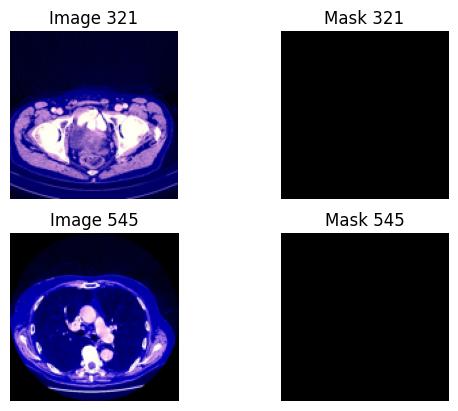

In [27]:
# Display two random images and masks
display_images_and_masks(train_images, train_masks)

# **Model Training**

In [28]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D


def build_model(input_shape=(128, 128, 3), num_classes=1, weights_path=None):  # Assuming binary segmentation
    base_model = ResNet50(weights=weights_path, include_top=False, input_tensor=Input(shape=input_shape))

    # Freeze base model layers
    for layer in base_model.layers:
        layer.trainable = False

    # Adding custom layers for segmentation
    x = base_model.output

    # Upsampling to match the original image size
    x = UpSampling2D((2, 2))(x)  # Increases to 32x32 for 128x128 input
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)  # Increases to 64x64
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)  # Increases to 128x128
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)  # Increases to 256x256
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)  # Increases to 256x256
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)

    # Final Convolution layer with 'num_classes' filters
    x = Conv2D(num_classes, (1, 1), activation='sigmoid')(x)  # Using sigmoid activation for binary segmentation

    model = Model(inputs=base_model.input, outputs=x)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Using binary cross-entropy for binary segmentation
    return model

In [29]:
model = build_model(weights_path='/kaggle/input/resnet50/resnet50_weights.h5')

In [30]:
history=model.fit(train_images, train_masks, batch_size=32, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
268/268 [==============================] - 1034s 4s/step - loss: 0.0554 - accuracy: 0.9785 - val_loss: 0.0329 - val_accuracy: 0.9871
Epoch 2/10
268/268 [==============================] - 1046s 4s/step - loss: 0.0361 - accuracy: 0.9850 - val_loss: 0.0476 - val_accuracy: 0.9724
Epoch 3/10
268/268 [==============================] - 1044s 4s/step - loss: 0.0312 - accuracy: 0.9863 - val_loss: 0.0969 - val_accuracy: 0.9741
Epoch 4/10
268/268 [==============================] - 1044s 4s/step - loss: 0.0540 - accuracy: 0.9794 - val_loss: 0.0362 - val_accuracy: 0.9855
Epoch 5/10
268/268 [==============================] - 1039s 4s/step - loss: 0.0721 - accuracy: 0.9795 - val_loss: 0.0351 - val_accuracy: 0.9864
Epoch 6/10
268/268 [==============================] - 1002s 4s/step - loss: 0.0270 - accuracy: 0.9881 - val_loss: 0.0390 - val_accuracy: 0.9862
Epoch 7/10
268/268 [==============================] - 1012s 4s/step - loss: 0.0379 - accuracy: 0.9852 - val_loss: 0.0439 - val_accuracy:

In [31]:
def plot_history(history):
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

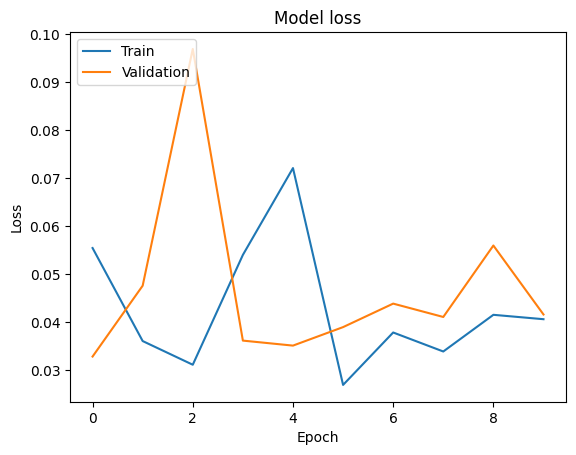

In [32]:
plot_history(history)

In [33]:
scores = model.evaluate(x_valid, y_valid)
scores[1]

15/15 [==============================] - 21s 1s/step - loss: 0.0416 - accuracy: 0.9850


0.9849694967269897

In [34]:
prediction = model.predict(x_test)

8/8 [==============================] - 12s 1s/step


In [35]:
test_scores = model.evaluate(x_test, y_test)
test_scores[1]

8/8 [==============================] - 11s 1s/step - loss: 0.0436 - accuracy: 0.9842


0.9841717481613159

1/1 [==============================] - 0s 94ms/step


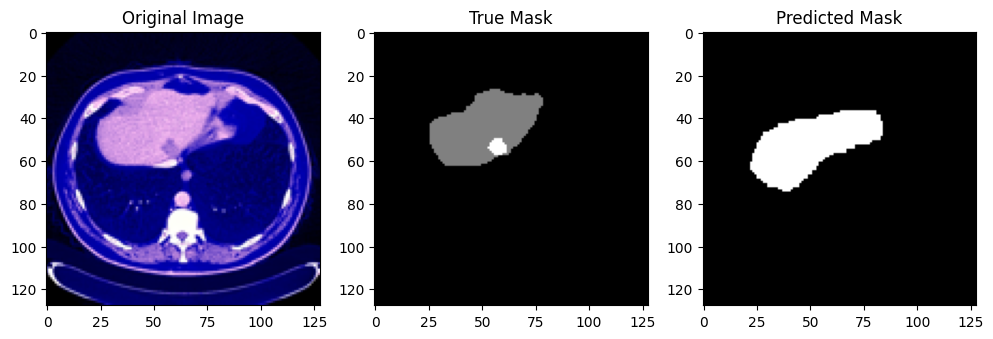

In [36]:
image_index = 44

# Load the image and true mask
input_image = x_test[image_index]
true_mask = y_test[image_index]

# Obtain the predicted mask from model2
predicted_mask = model.predict(np.expand_dims(input_image, axis=0))[0]

# Threshold the predicted mask (assuming it's a binary mask)
threshold = 0.5  # Adjust this threshold based on your model's output
predicted_mask_binary = (predicted_mask > threshold).astype(np.uint8)

# Plotting
plt.figure(figsize=(12, 4))

# Plot original image
plt.subplot(1, 3, 1)
plt.imshow(input_image)
plt.title('Original Image')

# Plot true mask
plt.subplot(1, 3, 2)
plt.imshow(true_mask[:, :, 0], cmap='gray')
plt.title('True Mask')

# Plot predicted mask
plt.subplot(1, 3, 3)
plt.imshow(predicted_mask_binary, cmap='gray')
plt.title('Predicted Mask')

plt.show()

In [37]:
initial_segmentation_results = model.predict(x_test)

8/8 [==============================] - 11s 1s/step


In [38]:
# Define U-Net model for lesion segmentation
def unet_model(input_shape):
    inputs = Input(input_shape)
    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    # Decoder
    conv3 = Conv2D(128, 3, activation='relu', padding='same')(pool2)
    up1 = UpSampling2D((2, 2))(conv3)
    concat1 = concatenate([conv2, up1], axis=-1)
    conv4 = Conv2D(64, 3, activation='relu', padding='same')(concat1)
    up2 = UpSampling2D((2, 2))(conv4)
    concat2 = concatenate([conv1, up2], axis=-1)
    outputs = Conv2D(1, 1, activation='sigmoid')(concat2)
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Instantiate U-Net model
input_shape = (128, 128, 3)  # Adjust based on your input image size
unet_model = unet_model(input_shape)
unet_model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Train U-Net model
unet_model.fit(train_images, train_masks, batch_size=32, epochs=10, validation_data=(x_valid, y_valid))


Epoch 1/10
268/268 [==============================] - 641s 2s/step - loss: 0.0547 - accuracy: 0.9834 - val_loss: 0.0306 - val_accuracy: 0.9873
Epoch 2/10
268/268 [==============================] - 636s 2s/step - loss: 0.0280 - accuracy: 0.9887 - val_loss: 0.0307 - val_accuracy: 0.9876
Epoch 3/10
268/268 [==============================] - 651s 2s/step - loss: 0.0225 - accuracy: 0.9904 - val_loss: 0.0259 - val_accuracy: 0.9892
Epoch 4/10
268/268 [==============================] - 624s 2s/step - loss: 0.0186 - accuracy: 0.9915 - val_loss: 0.0214 - val_accuracy: 0.9914
Epoch 5/10
268/268 [==============================] - 631s 2s/step - loss: 0.0166 - accuracy: 0.9921 - val_loss: 0.0185 - val_accuracy: 0.9926
Epoch 6/10
268/268 [==============================] - 617s 2s/step - loss: 0.0144 - accuracy: 0.9926 - val_loss: 0.0181 - val_accuracy: 0.9927
Epoch 7/10
268/268 [==============================] - 621s 2s/step - loss: 0.0118 - accuracy: 0.9931 - val_loss: 0.0240 - val_accuracy: 0.9908

In [39]:
# Evaluate refined segmentation results
evaluation = unet_model.evaluate(x_test, y_test)

8/8 [==============================] - 5s 560ms/step - loss: 0.0566 - accuracy: 0.9912


1/1 [==============================] - 0s 134ms/step


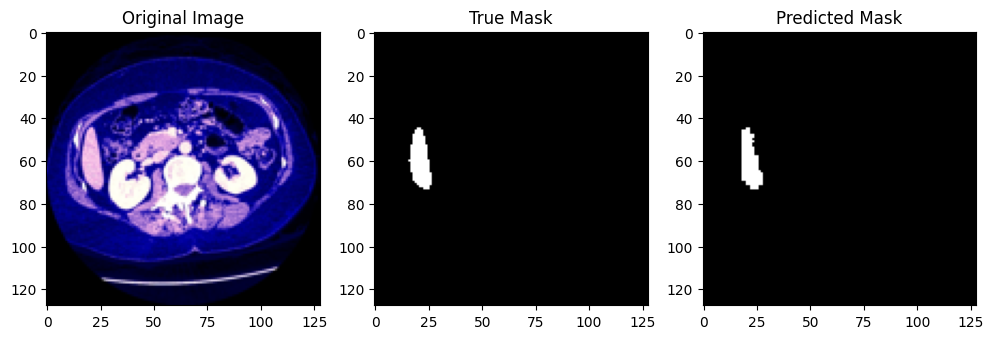

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have x_test and y_test
# Replace this with the actual index of the image you want to visualize
image_index = 45

# Load the image and true mask
input_image = x_test[image_index]
true_mask = y_test[image_index]

# Obtain the predicted mask from model2
predicted_mask = unet_model.predict(np.expand_dims(input_image, axis=0))[0]

# Threshold the predicted mask (assuming it's a binary mask)
threshold = 0.5  # Adjust this threshold based on your model's output
predicted_mask_binary = (predicted_mask > threshold).astype(np.uint8)

# Plotting
plt.figure(figsize=(12, 4))

# Plot original image
plt.subplot(1, 3, 1)
plt.imshow(input_image)
plt.title('Original Image')

# Plot true mask
plt.subplot(1, 3, 2)
plt.imshow(true_mask[:, :, 0], cmap='gray')
plt.title('True Mask')

# Plot predicted mask
plt.subplot(1, 3, 3)
plt.imshow(predicted_mask_binary[:, :, 0], cmap='gray')
plt.title('Predicted Mask')

plt.show()

In [ ]:
tf.keras.models.save_model(model, 'unetmodel.h6')